# Quasi-Random Sequence Generator Comparison

QMCPy's quasi-random sequence generators reference and build upon the following projects.

[1] D. Nuyens, *The Magic Point Shop of QMC point generators and generating vectors.*
MATLAB and Python software, 2018. Available from https://people.cs.kuleuven.be/~dirk.nuyens/

[2] Sou-Cheng T. Choi, Yuhan Ding, Fred J. Hickernell, Lan Jiang, Lluis Antoni Jimenez Rugama, Da Li, Jagadeeswaran Rathinavel, Xin Tong, Kan Zhang, Yizhi Zhang, and Xuan Zhou,GAIL: Guaranteed Automatic Integration Library (Version 2.3) [MATLAB Software], 2019.Available from http://gailgithub.github.io/GAIL_Dev/

[3] Marius Hofert and Christiane Lemieux (2019). qrng: (Randomized) Quasi-Random Number Generators. R package version 0.0-7. https://CRAN.R-project.org/package=qrng

[4] PyTorch: An Imperative Style, High-Performance Deep Learning Library. Paszke, Adam and Gross, Sam and Massa, Francisco and Lerer, Adam and Bradbury, James and Chanan, Gregory and Killeen, Trevor and Lin, Zeming and Gimelshein, Natalia and Antiga, Luca and Desmaison, Alban and Kopf, Andreas and Yang, Edward and DeVito, Zachary and Raison, Martin and Tejani, Alykhan and Chilamkurthy, Sasank and Steiner, Benoit and Fang, Lu and Bai, Junjie and Chintala, Soumith. Advances in Neural Information Processing Systems 32. H. Wallach and H. Larochelle and A. Beygelzimer and F. d\textquotesingle Alch\'{e}-Buc and E. Fox and R. Garnett. Pages 8024--8035. 2019. Curran Associates, Inc.http://papers.neurips.cc/paper/9015-pytorch-an-imperative-style-high-performance-deep-learning-library.pdf


AccumulateData for the following plots can be generated by running files in `workouts/lds_sequences/`

In [1]:
from qmcpy import *

import pandas as pd
pd.options.display.float_format = '{:.2e}'.format

from numpy import *
set_printoptions(threshold=2**10)
set_printoptions(precision=3)

from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


## General Lattice & Sobol Generator Usage
The following example uses the `Lattice` object to generate samples.<br>
The same code works when replacing `Lattice` with `Sobol`

In [2]:
# Unshifted Samples
lattice = Lattice(dimension=2, scramble=False, replications=0, seed=7, backend='MPS')
unshifted_samples = lattice.gen_samples(n_min=0,n_max=4)
print('Shape:',unshifted_samples.shape)
print('Samples:\n'+str(unshifted_samples))

Shape: (4, 2)
Samples:
[[0.   0.  ]
 [0.5  0.5 ]
 [0.25 0.75]
 [0.75 0.25]]


In [3]:
# Shifted Samples
lattice = Lattice(dimension=2, scramble=True, replications=0, seed=7, backend='GAIL')
shifted_samples = lattice.gen_samples(n_min=4, n_max=8)
print('Shape:',shifted_samples.shape)
print('Samples:\n'+str(shifted_samples))

Shape: (4, 2)
Samples:
[[0.201 0.405]
 [0.701 0.905]
 [0.451 0.655]
 [0.951 0.155]]


In [4]:
# Multiple Replications
lattice = Lattice(dimension=2, scramble=True, replications=3, seed=7, backend='GAIL')
samples = lattice.gen_samples(n_min=2, n_max=4)
print('Shape:',samples.shape)
print('Samples:\n'+str(samples))

Shape: (3, 2, 2)
Samples:
[[[0.326 0.03 ]
  [0.826 0.53 ]]

 [[0.688 0.973]
  [0.188 0.473]]

 [[0.228 0.788]
  [0.728 0.288]]]


## QMCPy Generator Times Comparison
Compare the speed of low-discrepancy-sequence generators from Python (QMCPy), MATLAB, and R.<br>
The following blocks visualize a speed comparison with MATLAB when generating 1 dimensional unshifted/unscrambled sequences. Note that the generators are reinitialized before every trial. <br

In [5]:
# Load AccumulateData
df_py = pd.read_csv('../outputs/lds_sequences/python_sequence_times.csv')
df_py.columns = ['n','py_l_MPS','py_l_GAIL','py_s_MPS_OG','py_s_MPS_QMCPy','py_s_PYTORCH']
df_m = pd.read_csv('../outputs/lds_sequences/matlab_sequence_times.csv', header=None)
df_m.columns = ['n', 'm_l', 'm_s']
df_r = pd.read_csv('../outputs/lds_sequences/r_sequence_times.csv',sep=' ')
df_r.columns = ['n','r_s']
df_r.reset_index(drop=True, inplace=True)

In [6]:
# Lattice DataFrame
df_l = pd.concat([df_py['n'], df_py['py_l_MPS'], df_py['py_l_GAIL'],df_m['m_l']], axis=1)
df_l.columns = ['N_Lattice','QMCPy_MPS','QMCPy_GAIL','MATLAB']
df_l.set_index('N_Lattice')

,QMCPy_MPS,QMCPy_GAIL,MATLAB
N_Lattice,,,
2.00e+00,8.38e-05,7.77e-05,3.76e-04
4.00e+00,7.25e-05,1.06e-04,2.23e-04
8.00e+00,9.68e-05,1.76e-04,1.54e-04
1.60e+01,9.06e-05,1.58e-04,1.59e-04
3.20e+01,1.07e-04,1.96e-04,1.68e-04
6.40e+01,1.26e-04,2.34e-04,1.60e-04
1.28e+02,1.51e-04,3.33e-04,1.60e-04
2.56e+02,1.44e-04,3.03e-04,1.72e-04
5.12e+02,1.63e-04,4.34e-04,1.87e-04


In [7]:
# Sobol DataFrame
df_s = pd.concat([df_py['n'], df_py['py_s_MPS_OG'], df_py['py_s_MPS_QMCPy'], df_py['py_s_PYTORCH'], \
                  df_m['m_s'], df_r['r_s']], axis=1)
df_s.columns = ['N_Sobol','MPS','QMCPy_MPS','PYTORCH','MATLAB','R']
df_s.set_index('N_Sobol')

,MPS,QMCPy_MPS,PYTORCH,MATLAB,R
N_Sobol,,,,,
2.00e+00,8.02e-01,5.30e-04,6.63e-03,6.36e-04,1.40e-04
4.00e+00,7.88e-01,5.22e-04,1.35e-04,3.91e-04,1.69e-04
8.00e+00,8.15e-01,4.32e-04,1.28e-04,3.68e-04,1.44e-04
1.60e+01,8.21e-01,4.32e-04,1.29e-04,9.57e-04,1.57e-04
3.20e+01,8.02e-01,4.49e-04,1.36e-04,4.58e-04,1.67e-04
6.40e+01,9.16e-01,5.24e-04,1.35e-04,5.07e-04,1.48e-04
1.28e+02,7.99e-01,6.09e-04,1.28e-04,4.09e-04,1.72e-04
2.56e+02,8.56e-01,9.91e-04,1.66e-04,2.84e-04,1.62e-04
5.12e+02,7.80e-01,1.42e-03,1.47e-04,2.47e-04,1.54e-04


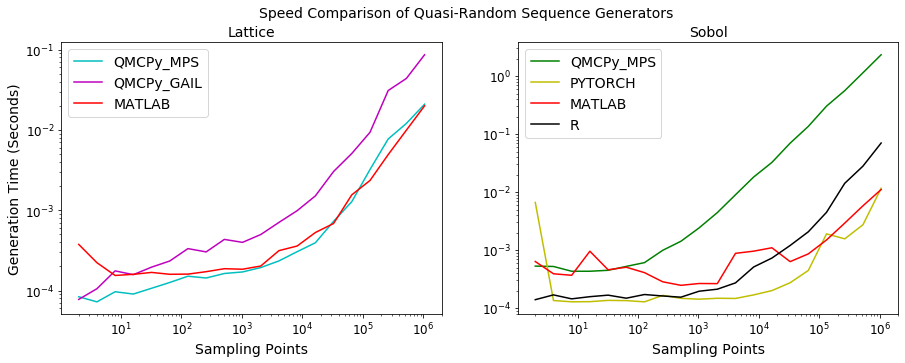

In [8]:
# Plot AccumulateData
fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Lattice
n = df_l['N_Lattice']
for l_type,color in zip(['QMCPy_MPS','QMCPy_GAIL','MATLAB'],['c','m','r']):
    ax[0].loglog(n, df_l[l_type], label=l_type, color=color)
ax[0].legend(loc='upper left')
ax[0].set_xlabel('Sampling Points')
ax[0].set_ylabel('Generation Time (Seconds)')
ax[0].set_title('Lattice')
# Sobol Plot
n = df_s['N_Sobol']
for s_type,color in zip(['QMCPy_MPS','PYTORCH','MATLAB','R'],['g','y','r','k']):
    ax[1].loglog(n, df_s[s_type], label=s_type, color=color)
ax[1].legend(loc='upper left')
ax[1].set_xlabel('Sampling Points')
ax[1].set_title('Sobol')
# Metas and Export
fig.suptitle('Speed Comparison of Quasi-Random Sequence Generators')
plt.savefig('../outputs/lds_sequences/lds_generator_times.png', dpi=200)

For lattice, QMCPy with GAIL backend is slower than both the Magic Point Shop backend and MATLAB. For Sobol, QMCPy with Magic Point Shop backend is significantly slower than using PyTorch backend or generating with MATLAB or R. It is important to note the above results are for 1 replication of unshifted/unscrambled nodes and individual generator instances were initialized before each trial.  

## *Magic Point Shop* Generators
In an effort to improve the generators speed, QMCPy developers modified the Sobol generator developed in *The Magic Point Shop*.<br>
The following blocks visualize the speed improvement of QMCPy when generating 1 dimensional unscrambled sobol nodes.<br>

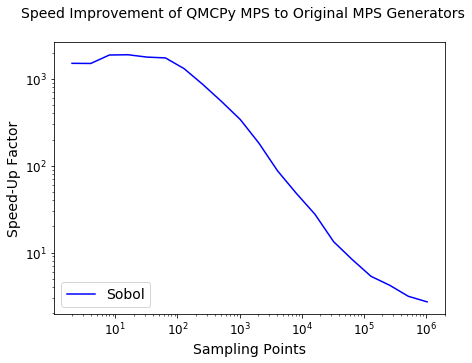

In [9]:
fig,ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
n = df_l['N_Lattice']
suf_s = df_s['MPS'].values / df_s['QMCPy_MPS'].values
ax.loglog(n, suf_s, label='Sobol', color='b')
ax.legend(loc='lower left')
ax.set_xlabel('Sampling Points')
ax.set_ylabel('Speed-Up Factor')
fig.suptitle('Speed Improvement of QMCPy MPS to Original MPS Generators')
plt.savefig('../outputs/lds_sequences/mps_speed_up_factor.png', dpi=200)